# Similarity-Based Constraint Score For Feature Selection Notebook

In this notebook, you will find a comprehensive summary of the project, detailing key steps undertaken and presenting results obtained during the implementation of our innovative constraint score.



## Part 1: Contraint score 4
Firstly we would like to implement the contraints score 4: $ \begin{equation}
SC^4_r = \frac{\tilde{f_r}^TL\tilde{f_r}}{\tilde{f_r}^TD\tilde{f_r}}*\frac{{f_r}^TL^\mathcal{M}f_r}{{f_r}^TL^\mathcal{C}f_r} = SL_r*SC_r
\end{equation} $
And see if our results correspond to the outcomes in the thesis by Maryam Kalakesh on the wine dataset.

In [2]:
%cd /Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS
import numpy as np
import pandas as pd
import sklearn.datasets as skd
from sklearn.preprocessing import StandardScaler
from c_scores import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as Knn
import matplotlib.pyplot as plt

/Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS


In [3]:
# Loding the wine data
X = skd.load_wine()
X_wine = X.data
X_target = X.target[np.newaxis].T

### To reproduce the experiments in the same conditions we need to partition the data and normalize them :
178 samples characterized by 13 features (n=178, d=13). These samples are divided into 3 classes with 59, 71, and 48 instances respectively. We select 30, 36, and 24 instances from each class to constitute the training set. And generating 10 constraints


In [4]:
wine_db = np.concatenate((X_wine,X_target), axis=1)
np.random.shuffle(wine_db)
target = wine_db[:,-1]
data = wine_db[:,:-1]
X_class_1 = target == 0
X_class_2 = target == 1
X_class_3 = target == 2
# now we need 30 prototypes for the first class 36 for the second and 24 for the third
X_class_1 = data[X_class_1]
X_class_2 = data[X_class_2]
X_class_3 = data[X_class_3]

X_class_1 = X_class_1[:30]
X_class_2 = X_class_2[:36]
X_class_3 = X_class_3[:24]

X_data_train_2 = np.concatenate((X_class_1,X_class_2,X_class_3), axis=0)
X_target_train_2 = np.concatenate((np.zeros(30),np.ones(36),np.ones(24)*2), axis=0)
# now we need to drop the prototypes from the data
X_data_test_2 = np.delete(data, np.concatenate((np.arange(30),np.arange(59,95),np.arange(131,155))), axis=0)
X_target_test_2 = np.delete(target, np.concatenate((np.arange(30),np.arange(59,95),np.arange(131,155))), axis=0)


#now we have our training and test data


In [5]:
# We calculate the constraint score 4 for the training data with 10 constraints
X_target_train_2_constraints= generate_constraints(X_data_train_2,10)
constraint_score_4 = laplacian_score(X_data_train_2)*constraint_score_1(X_data_train_2,X_target_train_2[np.newaxis].T)
features = np.argsort(constraint_score_4)
features

array([12,  4,  0,  3, 11,  2, 10,  9,  5,  6,  8,  1,  7])

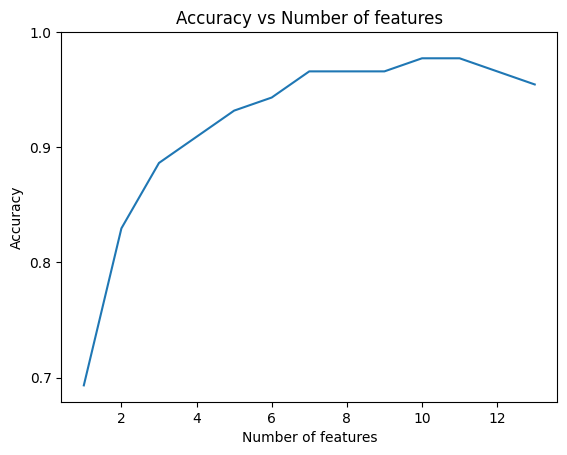

In [6]:
from sklearn.preprocessing import StandardScaler
n = 14
rep = 100
knn = Knn(n_neighbors=1)
all_accuracy = np.zeros((rep,n-1))
for j in range(rep):
    X_target_train_2_constraints= generate_constraints(X_data_train_2,10)
    constraint_score_4 = laplacian_score(X_data_train_2)*constraint_score_1(X_data_train_2,X_target_train_2[np.newaxis].T)
    features = np.argsort(constraint_score_4)
    features
    Accuracy = np.zeros(n-1)
    for i in range(1,n):
        X_wine_train = np.delete(X_data_train_2, features[i:], axis=1)
        X_wine_test = np.delete(X_data_test_2, features[i:], axis=1)
        y_train = X_target_train_2
        y_test = X_target_test_2
        scaler = StandardScaler()
        scaler.fit(X_wine_train)
        X_wine_train = scaler.transform(X_wine_train)
        X_wine_test = scaler.transform(X_wine_test)
        knn.fit(X_wine_train, y_train)
        y_pred = knn.predict(X_wine_test)
        Accuracy[i-1] = np.mean(y_pred == y_test)
    all_accuracy[j,:] = Accuracy

plt.plot(range(1,n), np.mean(all_accuracy, axis=0))
plt.xlabel('Number of features')
new_y_ticks = np.arange(0.7, 1, 0.1)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of features')
plt.yticks(new_y_ticks)
plt.show()

In [7]:
A = np.eye(3)
laplacian_score(A)

array([0.50661974, 0.50661974, 0.50661974])